In [1]:
# 구글 드라이브 MOUNT
from google.colab import drive
drive.mount('/content/drive')

# github와 연동하고 싶은 폴더로 이동
%cd /content/drive/MyDrive/study_DL/Study_DL

Mounted at /content/drive
/content/drive/MyDrive/study_DL/Study_DL


# 양방향 RNN

### 양방향 RNN 사용하기
- 양방향 RNN은 RNN의 한 변종이고, 특정 작업에서 기본 RNN보다 훨씬 좋은 성능을 냄
- 자연어 처리에서는 맥가이버 칼이라고 할 정도로 즐겨 사용된다고함 ^^
- 양방향 RNN은 RNN이 순서에 민감하다는 성질을 사용함
- 앞서 보았던 GRU, LSTM 같은 RNN을 2개를 사용함
- 각 RNN은 입력 시퀀스를 한 방향으로(시간 순서나 반대 순서)으로 처리한 후 각 표현을 합침
- 시퀀스를 양쪽 방향으로 처리하기 때문에 양방향 RNN은 단방향 RNN이 놓치기 쉬운 패턴을 감지할 수 있음



# 실습: IMDB 문제

### 데이터 불러오기

In [20]:
from keras.datasets import imdb
from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential
from tensorflow.keras.preprocessing import sequence

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [11]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [35]:
# 문자열 뒤집기 (a, b, c) -> (c, b, a)

x_train = [x[::-1] for x in train_data]
x_test = [x[::-1] for x in train_data]

In [19]:
print(x_train[0])

[32, 178, 19, 5345, 16, 15, 32, 103, 113, 4472, 16, 5, 283, 16, 12, 88, 1334, 38, 16, 65, 226, 4, 104, 25, 92, 224, 28, 36, 51, 18, 5535, 30, 144, 5, 480, 26, 476, 134, 21, 22, 226, 4, 18, 7486, 194, 6, 141, 26, 56, 2071, 32, 98, 297, 15, 381, 4, 88, 104, 13, 1029, 2, 4, 7, 46, 317, 400, 26, 476, 530, 43, 71, 36, 723, 5, 3766, 7, 2, 4, 256, 15, 5952, 117, 107, 4, 8, 2, 82, 16, 407, 14, 5, 52, 77, 28, 215, 12, 22, 6, 33, 1415, 25, 48, 135, 36, 51, 124, 25, 5, 619, 38, 16, 12, 130, 4, 33, 3785, 66, 480, 16, 5244, 2223, 4, 5, 106, 8, 316, 8, 12, 386, 62, 5, 2, 18, 626, 16, 12, 17, 515, 17, 22, 4, 1247, 13, 15, 76, 38, 530, 43, 16, 12, 87, 71, 22, 4, 469, 4613, 1920, 4, 22, 14, 19, 2025, 147, 6, 16, 50, 192, 4, 447, 13, 38, 546, 17, 1111, 4536, 172, 4, 39, 385, 336, 2, 167, 112, 172, 4, 150, 5, 284, 480, 35, 9, 2, 670, 50, 112, 838, 43, 100, 25, 5, 256, 36, 173, 4, 3941, 66, 4468, 458, 65, 1385, 1622, 973, 530, 43, 16, 22, 14, 1]


In [36]:
# 패딩화하기

x_train = sequence.pad_sequences(x_train, 500)
x_test = sequence.pad_sequences(x_test, 500)

print(x_train.shape), print(x_test.shape)

(25000, 500)
(25000, 500)


(None, None)

### 문자 순서를 거꾸로 한 모델 생성

In [23]:
model = Sequential()

model.add(Embedding(10000, 128))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])


history = model.fit(x_train, train_labels,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 148s 915ms/step - loss: 0.4980 - acc: 0.7663 - val_loss: 0.3580 - val_acc: 0.8660
Epoch 2/10
157/157 [==============================] - 131s 832ms/step - loss: 0.3142 - acc: 0.8816 - val_loss: 0.3138 - val_acc: 0.8848
Epoch 3/10
157/157 [==============================] - 131s 834ms/step - loss: 0.2553 - acc: 0.9053 - val_loss: 0.6001 - val_acc: 0.8146
Epoch 4/10
157/157 [==============================] - 154s 973ms/step - loss: 0.2156 - acc: 0.9235 - val_loss: 0.4552 - val_acc: 0.8436
Epoch 5/10
157/157 [==============================] - 133s 847ms/step - loss: 0.1998 - acc: 0.9302 - val_loss: 0.4187 - val_acc: 0.8502
Epoch 6/10
157/157 [==============================] - 133s 850ms/step - loss: 0.1752 - acc: 0.9394 - val_loss: 0.3670 - val_acc: 0.8766
Epoch 7/10
157/157 [==============================] - 132s 841ms/step - loss: 0.1582 - acc: 0.9455 - val_loss: 0.3810 - val_acc: 0.8696
Epoch 8/10
157/157 [============================

### 시각화

In [27]:
import matplotlib.pyplot as plt

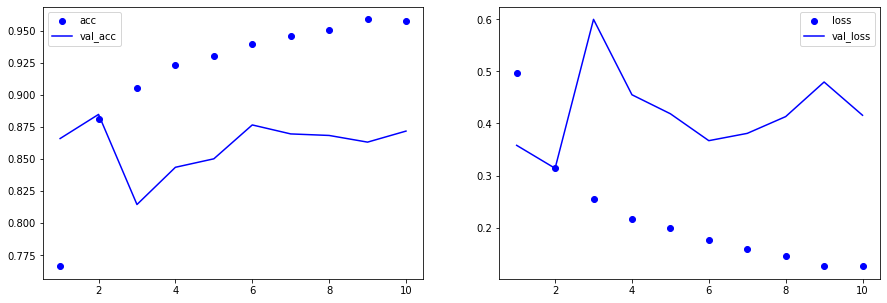

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

- 이게 문자 순서를 뒤집지 않고 훈련시킨 LSTM모델
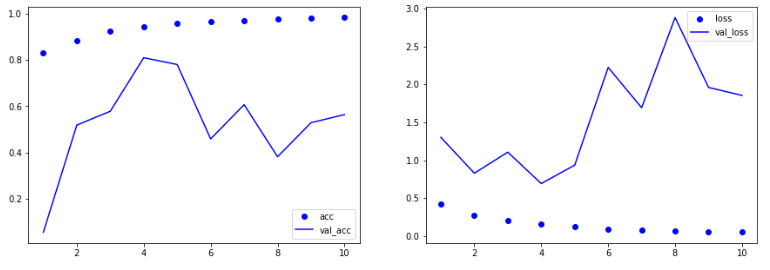
- 문자 순서를 뒤집어서 훈련을 시켰는데 나름 비스무리하게 나왔다
- 사실, 이전에 훈련시킨 모델은 실제 IMDB 데이터를 다운받아서 진행한거라 차이가 있을 것같긴한데, 무튼 되게 잘 만들어진 모델은 아니지만(과대적합) 얼추 훈련이 잘 된 모델이 될 수 있을 듯
- 이 데이터는 단어의 순서가 중요하지 않은 데이터라서 그럴 수도 있음(감성분석이니까)
- 그렇다면, 패딩을 앞에 둔거랑 뒤에 둔거랑 모델 훈련 차이가 갑자기 궁금하니까 진행해보겠음

#### 임베딩 전 데이터 패딩을 post로 한 결과로 돌려보기

In [38]:
# 문자열 뒤집기 (a, b, c) -> (c, b, a)

x_train = [x[::-1] for x in train_data]
x_test = [x[::-1] for x in train_data]

In [39]:
# 패딩화하기

x_train = sequence.pad_sequences(x_train, 500, padding = 'post')
x_test = sequence.pad_sequences(x_test, 500, padding = 'post')

print(x_train.shape), print(x_test.shape)

(25000, 500)
(25000, 500)


(None, None)

In [40]:
model = Sequential()

model.add(Embedding(10000, 128))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])


history = model.fit(x_train, train_labels,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 137s 855ms/step - loss: 0.6926 - acc: 0.5071 - val_loss: 0.6902 - val_acc: 0.5020
Epoch 2/10
157/157 [==============================] - 132s 840ms/step - loss: 0.6808 - acc: 0.5228 - val_loss: 0.7312 - val_acc: 0.5066
Epoch 3/10
157/157 [==============================] - 188s 1s/step - loss: 0.6657 - acc: 0.5352 - val_loss: 0.6859 - val_acc: 0.5186
Epoch 4/10
157/157 [==============================] - 149s 949ms/step - loss: 0.6512 - acc: 0.5431 - val_loss: 0.8846 - val_acc: 0.5126
Epoch 5/10
157/157 [==============================] - 160s 1s/step - loss: 0.6472 - acc: 0.5516 - val_loss: 0.6830 - val_acc: 0.5340
Epoch 6/10
157/157 [==============================] - 146s 931ms/step - loss: 0.5395 - acc: 0.7630 - val_loss: 0.5286 - val_acc: 0.7820
Epoch 7/10
157/157 [==============================] - 132s 840ms/step - loss: 0.5115 - acc: 0.7786 - val_loss: 0.5205 - val_acc: 0.7922
Epoch 8/10
157/157 [==============================] - 

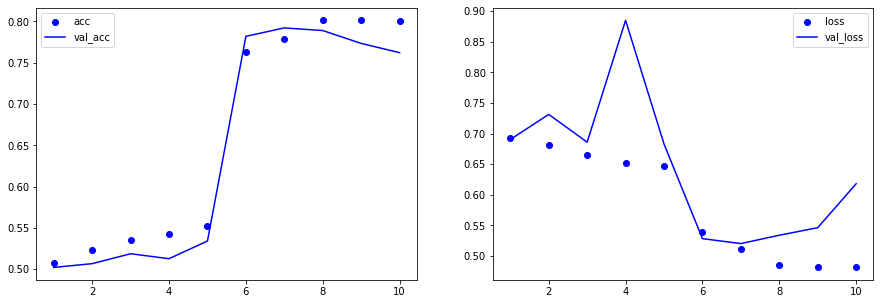

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

- 중간에 갑자기 정확도가 튀는 구간이 생기고 loss가 줄어드는 구간이 생김
- 딱히 성능이 padding을 pre로 한 것보다 좋진 않음
- 검색해보니까 원래 pre가 post보다 더 성능이 좋다고 함 
- 순환 신경망 모델은 앞보다 뒤의 단어가 입력으로 들어갈 때, 앞 단어들의 시퀀스 모델링이 반영된 가장 중요한 상태기 때문인데, post의 경우는 뒷 단어가 0으로 배치되어 모델 입장에서 뒤로 갈수록 피처가 희미해지는 long dependency현상이 일어난다고 함

### 양방향 RNN 모델 생성

In [43]:
from keras.layers import Bidirectional

In [44]:
# 문자열 뒤집기 (a, b, c) -> (c, b, a)

x_train = [x[::-1] for x in train_data]
x_test = [x[::-1] for x in train_data]

In [45]:
# 패딩화하기

x_train = sequence.pad_sequences(x_train, 500)
x_test = sequence.pad_sequences(x_test, 500)

print(x_train.shape), print(x_test.shape)

(25000, 500)
(25000, 500)


(None, None)

In [46]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])


history = model.fit(x_train, train_labels,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 123s 733ms/step - loss: 0.5401 - acc: 0.7313 - val_loss: 0.4092 - val_acc: 0.8316
Epoch 2/10
157/157 [==============================] - 113s 718ms/step - loss: 0.3333 - acc: 0.8742 - val_loss: 0.3039 - val_acc: 0.8818
Epoch 3/10
157/157 [==============================] - 115s 730ms/step - loss: 0.2624 - acc: 0.9049 - val_loss: 0.2950 - val_acc: 0.8814
Epoch 4/10
157/157 [==============================] - 117s 746ms/step - loss: 0.2246 - acc: 0.9173 - val_loss: 0.3488 - val_acc: 0.8532
Epoch 5/10
157/157 [==============================] - 115s 734ms/step - loss: 0.2031 - acc: 0.9285 - val_loss: 0.3607 - val_acc: 0.8802
Epoch 6/10
157/157 [==============================] - 114s 729ms/step - loss: 0.1777 - acc: 0.9382 - val_loss: 0.3813 - val_acc: 0.8548
Epoch 7/10
157/157 [==============================] - 114s 726ms/step - loss: 0.1648 - acc: 0.9421 - val_loss: 0.4153 - val_acc: 0.8730
Epoch 8/10
157/157 [============================

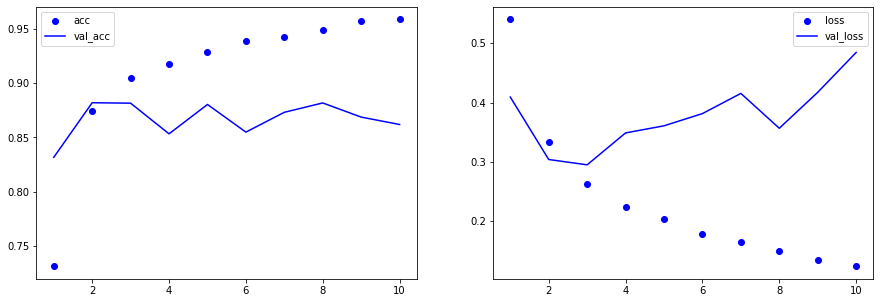

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

- 성능이 훨씬 좋아짐
- 최대 88% 정확도를 가짐
- 이전에 활용한 순방향 LSTM모델보다 좋은 수치
- 근데 과대적합이 좀 빨리 시작되는 느낌인데 이건 LSTM모델보다 한층 더 쌓았기 때문임!
- 근데 양방향 RNN이라고 해서 모든 자연어 모델링 방식에 좋은 것은 아님
  - 감성분석과 다르게 최근 정보가 오래된 것보다 훨씬 의미 있는 자연어처리에는 어울리지 않는 모델임